# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.060136e+01     7.595435e+00
 * time: 0.004382133483886719
     1     2.880997e+01     5.423184e+00
 * time: 0.013163089752197266
     2     1.674728e+01     3.684839e+00
 * time: 0.038455963134765625
     3     1.298976e+01     1.842488e+00
 * time: 0.05840802192687988
     4     1.157225e+01     2.066631e+00
 * time: 0.07877898216247559
     5     1.067315e+01     1.395294e+00
 * time: 0.09610199928283691
     6     1.022136e+01     1.297891e+00
 * time: 0.11374402046203613
     7     9.733602e+00     7.906879e-01
 * time: 0.1299431324005127
     8     9.498805e+00     9.571391e-01
 * time: 0.1461939811706543
     9     9.376034e+00     6.080652e-01
 * time: 0.16211605072021484
    10     9.256797e+00     4.508729e-01
 * time: 0.1778249740600586
    11     9.159711e+00     6.484503e-01
 * time: 0.18931198120117188
    12     9.101580e+00     6.137670e-01
 * time: 0.20073914527893066
    13     9.062695e+00     4.728745e-01
 * time:

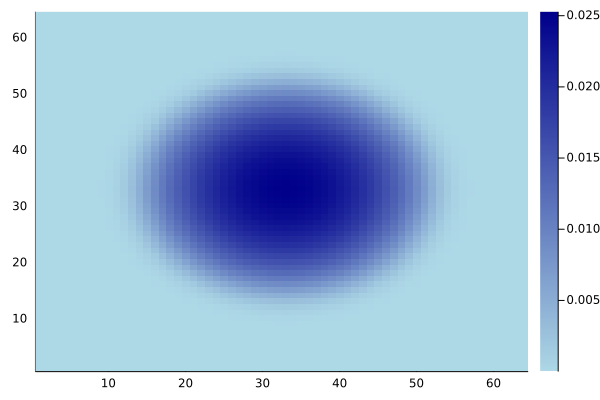

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)